In [10]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\power_transformer_dataset.csv')
df.head()

,Income,House_Age,Loan_Amount,Population,Distance_to_City
0,23463.404499,31.777010,711.799780,4907.388700,11.062870
1,150506.071546,16.646556,80.498010,16272.845172,15.134931
2,65837.284677,33.801979,131.571861,23204.846235,15.529502
3,45647.127689,36.105857,43.655510,2274.939286,7.180263
4,8481.243523,35.597904,188.722145,693.217956,5.918914


In [3]:
# Check for missing values
df.isnull().sum()

Income              0
House_Age           0
Loan_Amount         0
Population          0
Distance_to_City    0
dtype: int64

In [4]:
# describe the dataset
df.describe()

,Income,House_Age,Loan_Amount,Population,Distance_to_City
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48625.297398,30.988958,193.742849,9781.385139,9.828291
std,48625.494308,9.889330,188.879563,10049.635728,4.948145
min,232.139203,0.786495,0.002327,0.307193,0.000000
25%,13457.826466,24.358791,58.399521,2782.904643,6.412303
50%,34339.130862,30.842139,133.988975,6712.766571,9.798203
75%,68191.510430,37.396317,267.785526,13301.149179,12.936149
max,408622.279891,61.931076,1225.764599,77235.295221,26.215465


In [5]:
X=df.drop(columns=['Income'])
y=df['Income']

In [6]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# applying without any transformation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [9]:
# scoring the model
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: -0.02168484847249008


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1358877706.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


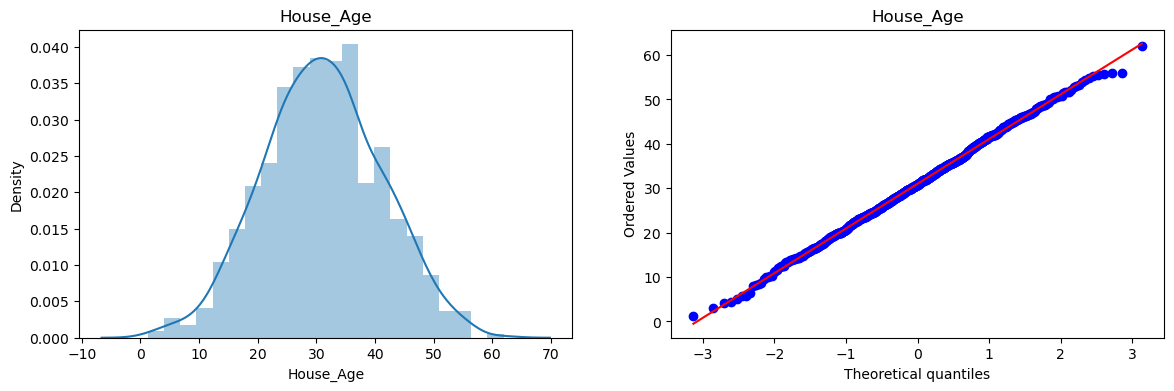

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1358877706.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


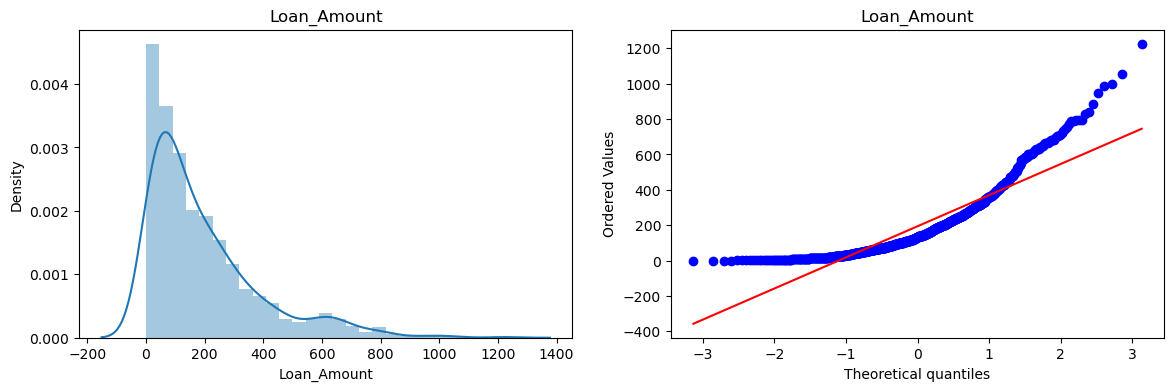

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1358877706.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


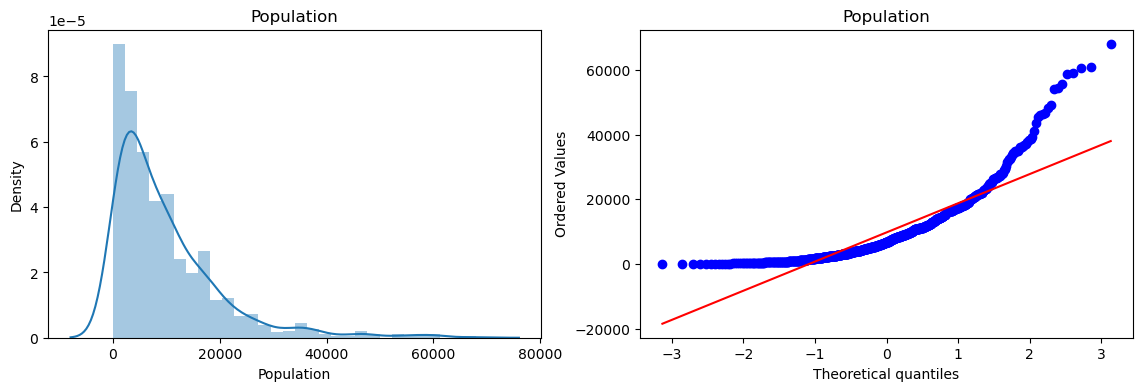

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1358877706.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


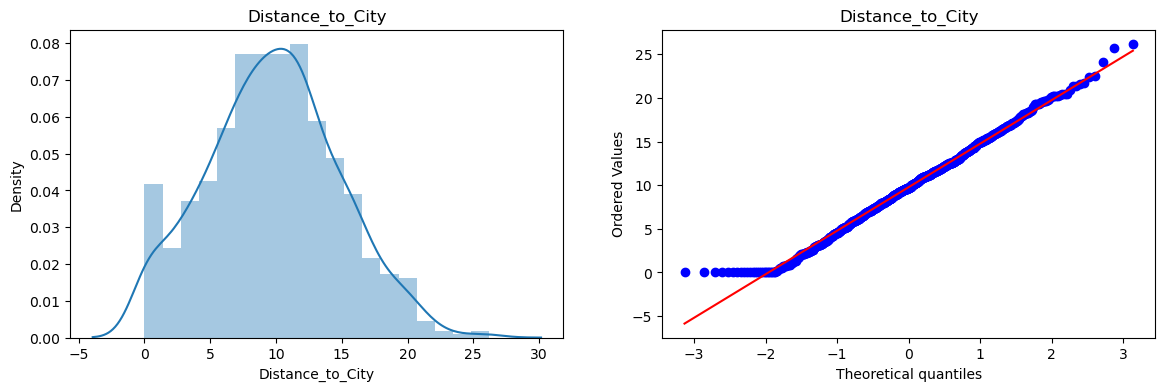

In [32]:
# plotting the displots without any transformation 

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()

In [19]:
# apply Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score as cross_aval_score
pt=PowerTransformer(method='box-cox')

X_transformed=pt.fit_transform(X_train+0.00001)  # Adding a small constant to avoid zero values

lr=LinearRegression()
np.mean(cross_aval_score(lr,X_transformed,y_train,scoring='r2',cv=5))



-0.010021951739337731

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1832630912.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1832630912.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


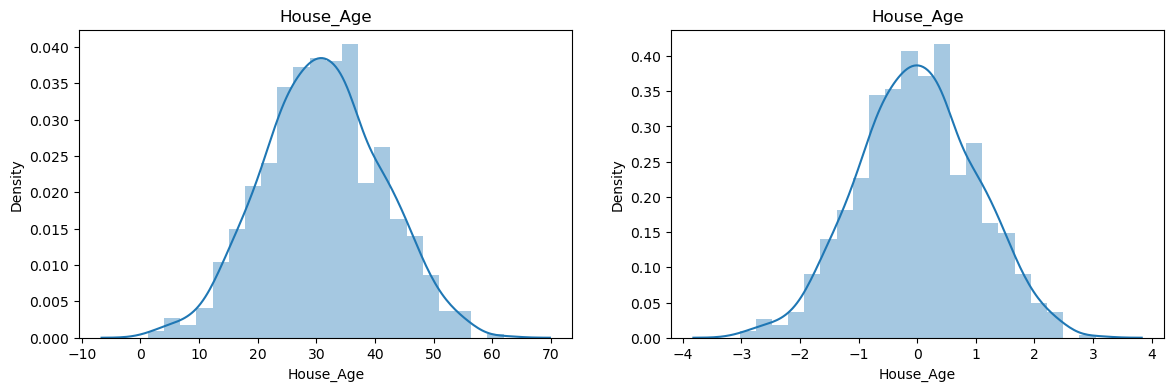

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1832630912.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1832630912.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


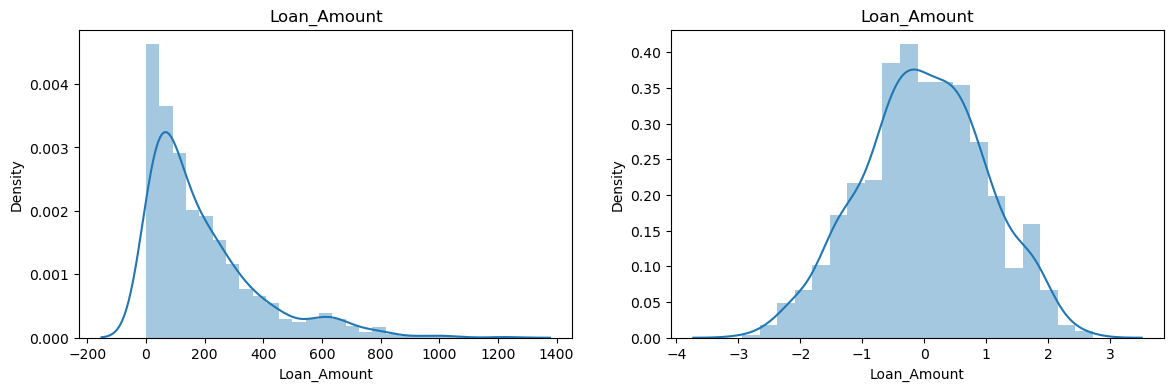

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1832630912.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1832630912.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


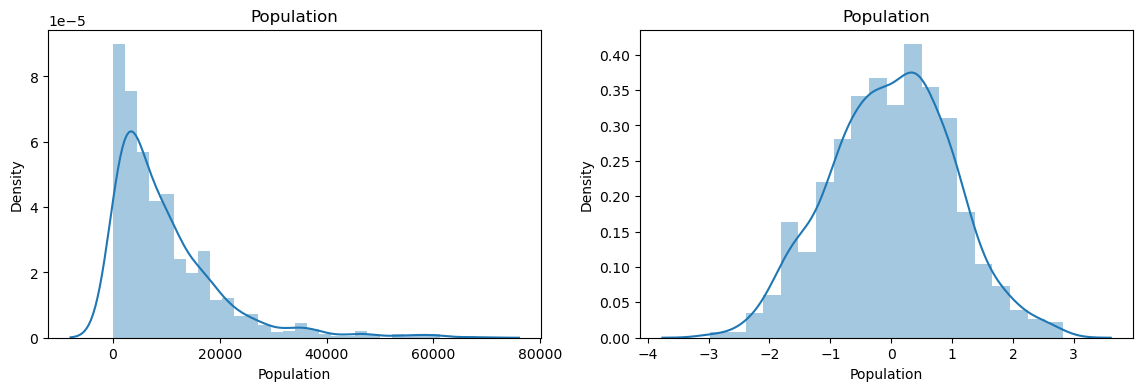

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1832630912.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\1832630912.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


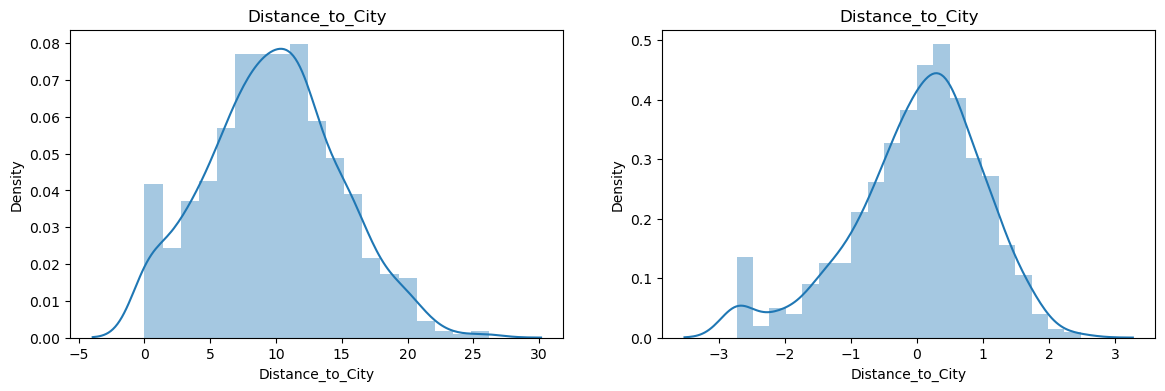

In [31]:
## before and after comparison fro box-cox plot
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed_df[col])
    plt.title(col)
    plt.show()

In [33]:
# applying yeo-johnson transform

pt=PowerTransformer()

X_train_transformed2=pt.fit_transform(X_train)
X_test_transformed2=pt.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

lr=LinearRegression()
lr.fit(X_train_transformed2,y_train)
y_pred3=lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

-0.023801030738014317


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\2492191240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\2492191240.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df2[col])


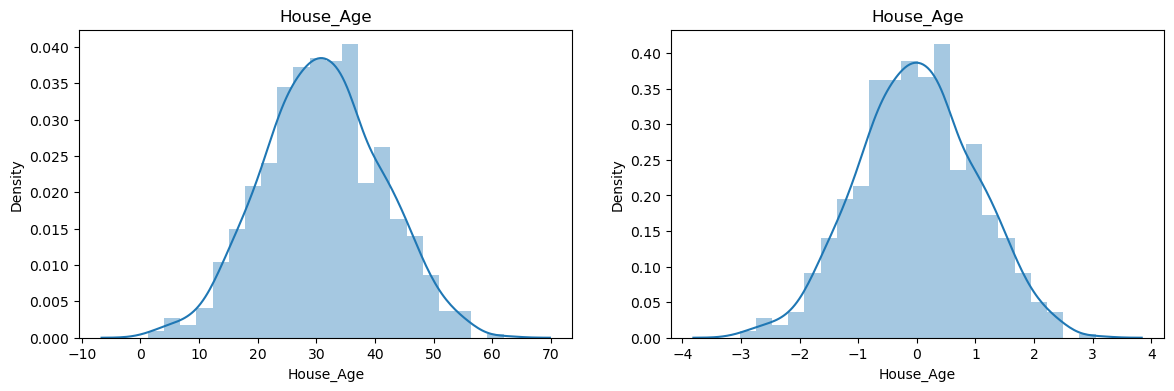

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\2492191240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\2492191240.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df2[col])


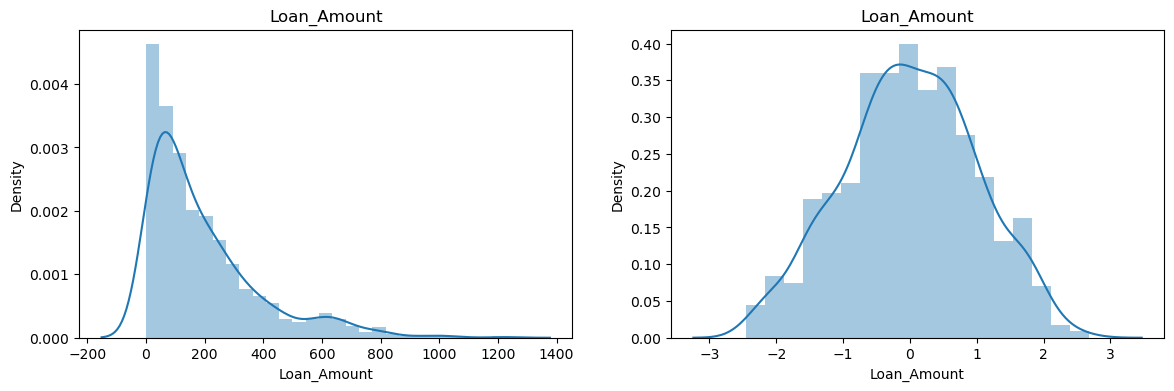

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\2492191240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\2492191240.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df2[col])


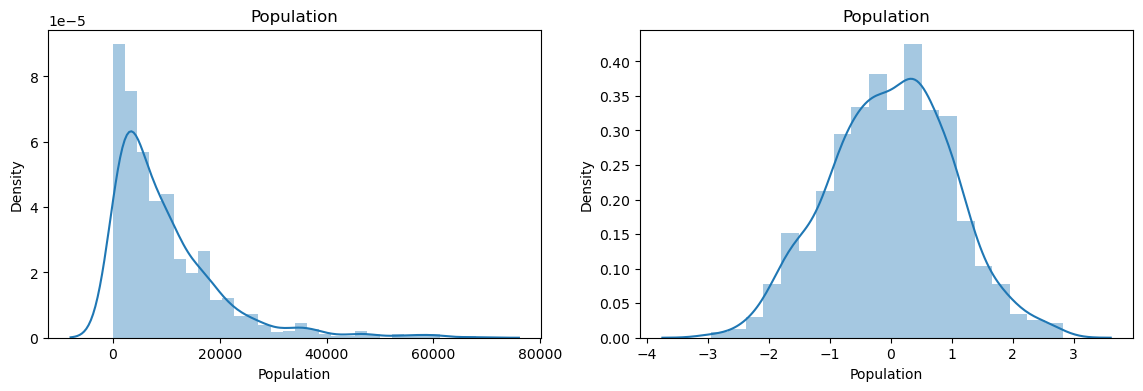

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\2492191240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9984\2492191240.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df2[col])


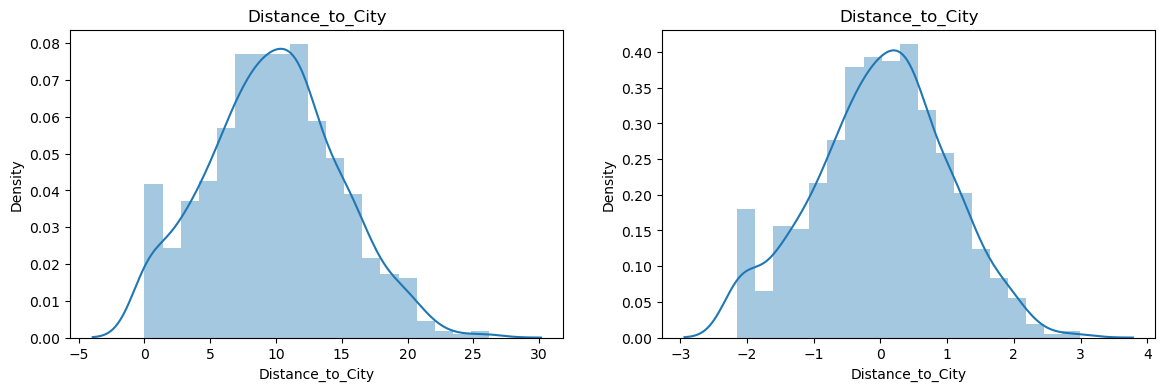

In [34]:
## before and after comparison for yeo-johnson plot
X_train_transformed_df2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed_df2[col])
    plt.title(col)
    plt.show()